# Toy example

In [62]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from random import shuffle
import tammo_lib as tl
import numpy as np
import ormachine
from importlib import reload

In [82]:
# generate toy data
X = 2*np.array([[0,0,0,1,1,1,0,0,0],[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,1,0,1]])-1
X = np.concatenate(20*[X])

# initialise ormachine
orm = ormachine.machine()

# define model architecture
data = orm.add_matrix(val=X, sampling_indicator=False)
layer1 = orm.add_layer(size=2, child=data)

# run gibbs sampler
orm.infer(no_samples=1000, convergence_window=20,
          convergence_eps=1e-4, burn_in_min=300, 
          burn_in_max=3000, fix_lbda_iters=200)

burning in markov chain...
	iteration lala: 560 recon acc.: 0.926: 0.926
	converged at reconstr. accuracy: 0.926
allocating memory to save samples...
drawing samples...
	iteration 1000; recon acc.: 0.926
finished.


## Inspect results

(<matplotlib.figure.Figure at 0x7f394c6c1b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f394c4cb198>)

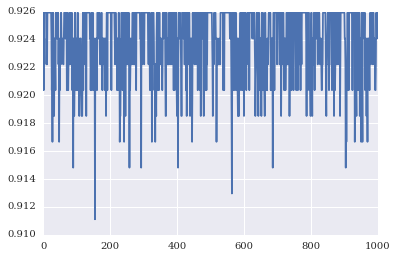

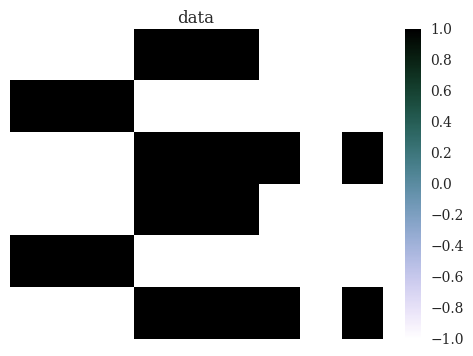

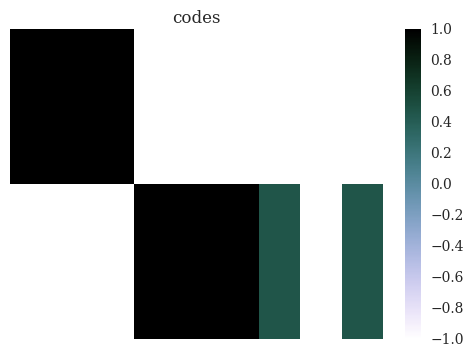

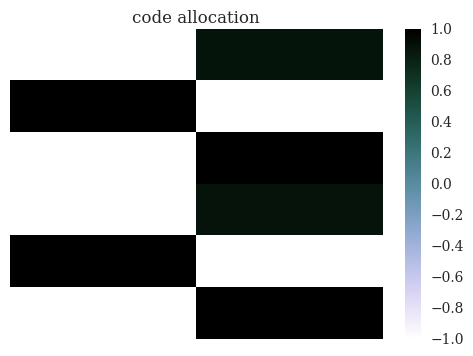

In [83]:
from scipy.special import expit
plt.plot(expit(layer1.lbda.trace))
tl.plot_pattern(X[:6,:], vmin=-1, title='data')
tl.plot_pattern(layer1.u.mean().transpose(), title='codes')
tl.plot_pattern(layer1.z.mean()[:6,:], title='code allocation')
